In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

C:\Users\ABHIJIT KHULE\AppData\Local\Temp\ipykernel_4544\2648716582.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv("E://LP VI//dl//2_letter_recognition.data", sep = ",")

In [3]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [4]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

c:\Users\ABHIJIT KHULE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ABHIJIT KHULE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

c:\Users\ABHIJIT KHULE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


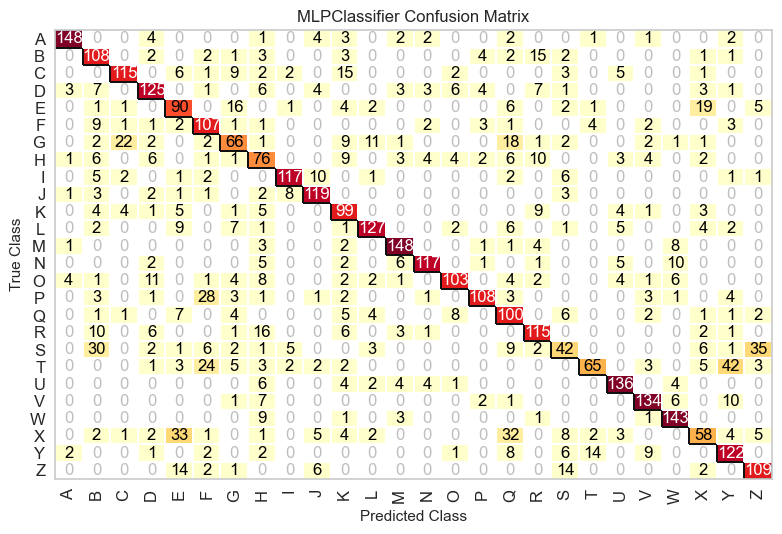

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
from yellowbrick.classifier import ConfusionMatrix

# Instantiate the visualizer with the classification model
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, Y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_validation, Y_validation)

# How did we do?
cm.show()

In [12]:
cm.score(X_validation, Y_validation)

c:\Users\ABHIJIT KHULE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.69925

In [13]:
predictions = cm.predict(X_validation)
predictions

array(['C', 'B', 'D', ..., 'H', 'B', 'W'], dtype='<U1')

In [14]:

print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.69925
